# Data Analysis and Prediction of Credit Card Fraud Detection Data

This Python notebook contains a data analysis of credit card fraud data from Kaggle (https://www.kaggle.com/dalpozz/creditcardfraud), along with a predictive model aiming at detecting a fraudulent transaction. The predictive model to be developed is a neural network implemented in tensorflow.

First we load in the required libraries and the data set we are going to be working with.

The data set has been anonymized for confidentiality and the features V1,..., V28 are the principal components of a PCA transformation. There is three other variables: Amount, Class, Time. Amount denotes the amount of money of the transaction; Class denotes a fraudulent transaction, 0, or normal transaction, 1; and Time is an integer denoting time since first transaction in seconds. Also note that the entire data set is two days of credit card transactions.

## Data Exploration

So let's take a look at the structure of the data set and do some analysis.

In [1]:
import math
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy
from tensorflow.python.framework import ops

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
dataset = pd.read_csv("creditcard.csv", header = 0)

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print("Percent of total transactions that are fraudulent")
print(dataset["Class"].mean()*100)

Percent of total transactions that are fraudulent
0.1727485630620034


Fraudulent transactions represent only ~0.17% of total transactions. This means that we are aiming to predict anomalous events.

In [6]:
print("Losses due to fraud:")
print("Total amount lost to fraud")
print(dataset.Amount[dataset.Class == 1].sum())
print("Mean amount per fraudulent transaction")
print(dataset.Amount[dataset.Class == 1].mean())
print("Compare to normal transactions:")
print("Total amount from normal transactions")
print(dataset.Amount[dataset.Class == 0].sum())
print("Mean amount per normal transactions")
print(dataset.Amount[dataset.Class == 0].mean())

Losses due to fraud:
Total amount lost to fraud
60127.96999999997
Mean amount per fraudulent transaction
122.21132113821133
Compare to normal transactions:
Total amount from normal transactions
25102462.039983638
Mean amount per normal transactions
88.29102242225574


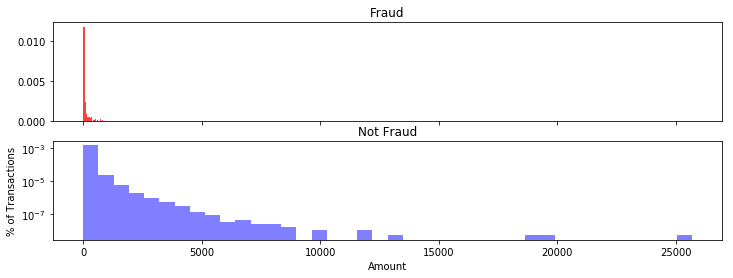

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 40

ax1.hist(dataset.Amount[dataset.Class == 1], bins = bins, normed = True, alpha = 0.75, color = 'red')
ax1.set_title('Fraud')

ax2.hist(dataset.Amount[dataset.Class == 0], bins = bins, normed = True, alpha = 0.5, color = 'blue')
ax2.set_title('Not Fraud')

plt.xlabel('Amount')
plt.ylabel('% of Transactions')
plt.yscale('log')
plt.show()

It is interesting to see that while fraudulent transactions make up a small portion of the data set, they have a higher average amount per transaction. It may be useful to try a model with Amount as a feature.

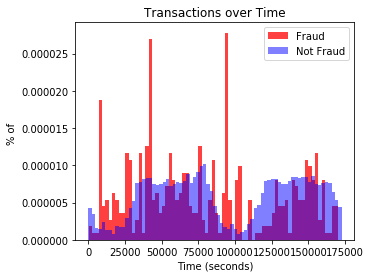

In [8]:
bins = 75
plt.hist(dataset.Time[dataset.Class == 1], bins = bins, normed = True, alpha = 0.75, label = 'Fraud', color = 'red')
plt.hist(dataset.Time[dataset.Class == 0], bins = bins, normed = True, alpha = 0.5, label = 'Not Fraud', color = 'blue')
plt.legend(loc='upper right')
plt.xlabel('Time (seconds)')
plt.ylabel('% of ')
plt.title('Transactions over Time')
plt.show()

This histogram shows the percentage of transactions made over the time period. We see that more fraudulent activity typically happens when there is downtime in overall transactions. If we assume that the data is collected from Day 0 12:01 AM to Day 2 11:59 PM, since it is described as being collected over "two days", we see that fraudulent activity is occuring in the very early AM. I am reluctant to use Time as a feature here in our predictive model because there is only two days of data. If there was a month or so of data, this would definitely be useful as a feature if we see a similar pattern over a longer time period.

Let's take a look at the V1,...,V28 features.

In [9]:
Vfeatures = dataset.iloc[:,1:29].columns
print(Vfeatures)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')


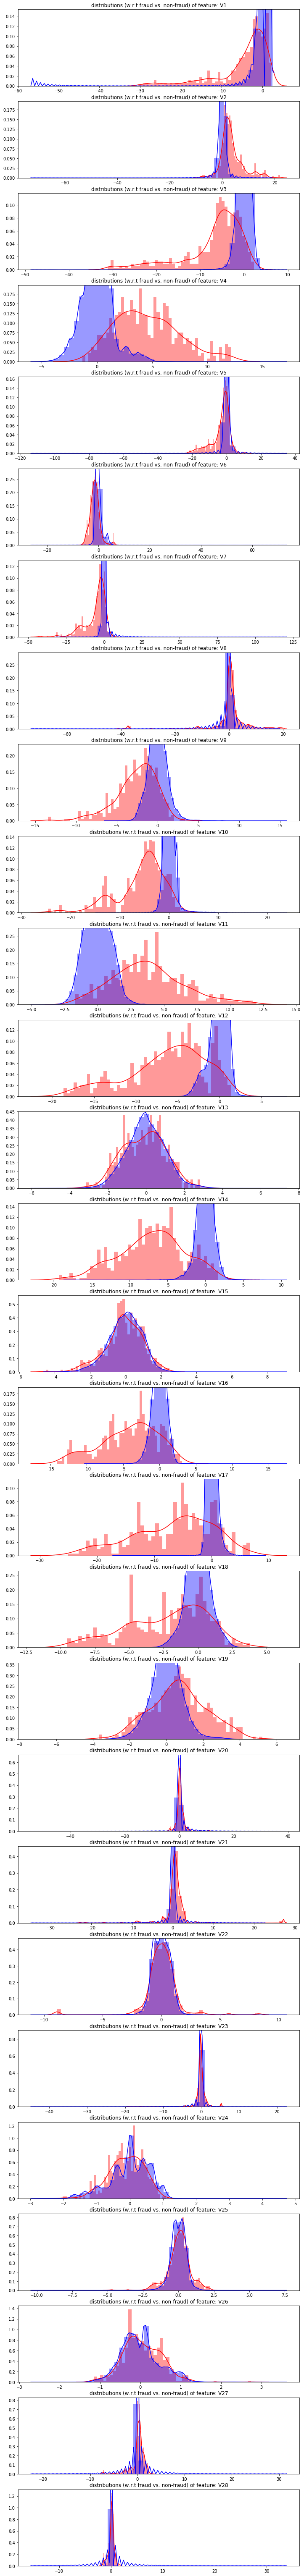

In [10]:
import matplotlib.gridspec as gridspec
import seaborn as sns
bins = 50
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, V in enumerate(dataset[Vfeatures]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[V][dataset.Class == 1], bins = bins, norm_hist = True, color = 'red')
    sns.distplot(dataset[V][dataset.Class == 0], bins = bins, norm_hist = True, color = 'blue')
    ax.set_xlabel('')
    ax.set_title('distributions (w.r.t fraud vs. non-fraud) of feature: ' + str(V))
plt.show()

This shows the distribution differences of the features when comparing fraudulent transactions to normal transactions. 

Ok, let's develop a neural network in tensorflow with the goal of predicting credit card fraud. We will use the all the V features and Amount as features in our model. First we need to put our input data sets into the correct format.

In [53]:
model_features = dataset.iloc[:,1:30].columns
print(model_features)

# normalize Amount column
dataset["Amount"] = (dataset["Amount"]-dataset["Amount"].mean())/dataset["Amount"].std()

# shuffle and split our data set
dataset = dataset.sample(frac=1).reset_index(drop=True)
split = np.random.rand(len(dataset)) < 0.95
dataset_train = dataset[split]
dataset_test = dataset[~split]
train_x = dataset_train.as_matrix(columns = model_features)
train_y = dataset_train["Class"]
test_x = dataset_test.as_matrix(columns = model_features)
test_y = dataset_test["Class"]

# check the distribution of fraud between train and test
# if these are too far off, try shuffling again
print(dataset["Amount"].sum())
print(train_y.mean()*100)
print(test_y.mean()*100)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
-1.5526993024650437e-09
0.2926685476060134
0.3591380686352753


In [54]:
''' 
modify train and test sets for correct dimensions and check it.
dimensions should be 
X - (# of features, # of examples)
Y - (1, # of examples)
'''
train_x = train_x.T
train_y = np.reshape(train_y, (1,len(dataset_train)))
test_x = test_x.T
test_y = np.reshape(test_y, (1,len(dataset_test)))

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(29, 47494)
(1, 47494)
(29, 2506)
(1, 2506)


C:\Users\Samantha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


# Neural Network Model Implemented in TensorFlow

Here we develop the neural network model we will use to try and predict fraudulent transactions.

In [55]:
def create_placeholders(n_x, n_y):
    # n_x - number of features
    # n_y - number of classes
    X = tf.placeholder(tf.float32, shape = (n_x, None))
    Y = tf.placeholder(tf.float32, shape = (n_y, None))
    return X, Y

In [56]:
def initialize_parameters():                  
    W1 = tf.get_variable("W1", [14,29], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [14,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [7,14], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [7,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,7], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [57]:
def forward_propagation(X, parameters):
    # Retrieve the parameters from the dictionary parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.add(tf.matmul(W1, X), b1)                                   
    A1 = tf.nn.elu(Z1)                                              
    Z2 = tf.add(tf.matmul(W2, A1), b2)                                      
    A2 = tf.nn.elu(Z2)                                         
    Z3 = tf.add(tf.matmul(W3, A2), b3)
    
    return Z3

In [58]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [59]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [60]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.001,
          num_epochs = 1500, minibatch_size = 1024, print_cost = True):
    # Implements a three layer layer neural network using tensorflow
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost

    X, Y = create_placeholders(n_x, n_y)

    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                epoch_cost += minibatch_cost / num_minibatches
                
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 0.660276
Cost after epoch 100: 0.001383
Cost after epoch 200: 0.000550
Cost after epoch 300: 0.000274
Cost after epoch 400: 0.000218
Cost after epoch 500: 0.000142
Cost after epoch 600: 0.000070
Cost after epoch 700: 0.000133
Cost after epoch 800: 0.000029
Cost after epoch 900: 0.000016
Cost after epoch 1000: 0.000135
Cost after epoch 1100: 0.000051
Cost after epoch 1200: 0.000019
Cost after epoch 1300: 0.000004
Cost after epoch 1400: 0.000008


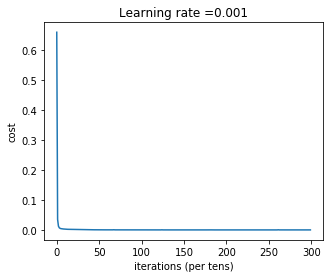

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 1.0


In [61]:
model_params = model(train_x, train_y, test_x, test_y)

And there is our trained model! Train accuracy is 100% and test accuracy is 100%. This is not very accurate as we have not used the entire data set due to computational restrictions.